# Blending and Pasting Images

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# First Image
img1 = cv2.imread("../imgs/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Second Image
img2 = cv2.imread("../imgs/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

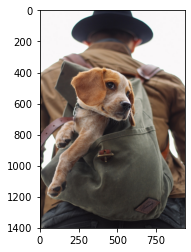

In [3]:
# Show First Image
plt.imshow(img1)

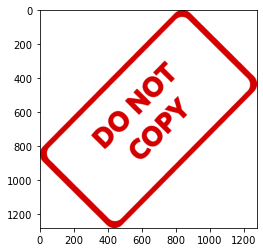

In [4]:
# Show Second Image
plt.imshow(img2)

In [5]:
img1.shape

(1401, 934, 3)

In [6]:
img2.shape

(1280, 1277, 3)

In [7]:
# Resizing Images
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

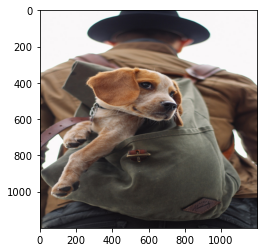

In [8]:
plt.imshow(img1)

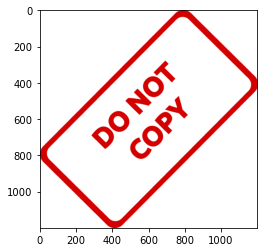

In [9]:
plt.imshow(img2)

In [10]:
# Blended images of the same size
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

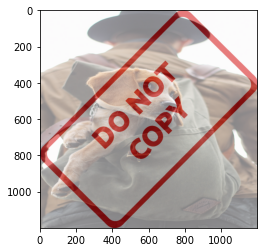

In [11]:
plt.imshow(blended)

In [12]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)

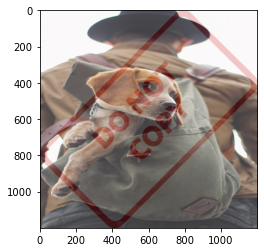

In [13]:
plt.imshow(blended)